# Linearne diferencijalne jednadžbe drugog reda s konstantnim koeficijentima

## 1. Motivacija

Neka je dana nit duljine $L$ pričvršćena za tvrdu podlogu s gornje strane. Na nit pričvrstimo kuglicu mase $m$. Pretpostavljamo da je veličina kuglice zanemariva u odnosu na duljinu niti, te ju promatramo kao masu koncentriranu u jednoj točki. Sa $\theta(t)$ označit ćemo otklon mase $m$ u trenutku $t$ od stanja mirovanja. Ukoliko otklonimo kuglicu iz položaja ravnoteže započet će titranje
  ![slika1](https://raw.githubusercontent.com/anazga/kongres/master/njihalo.gif "Njihalo")

Korištenjem drugog Newtonovog zakona lako dobivamo jednadžbu

\begin{equation}\theta''(t)+\frac{L}{g}\sin\theta(t)=0\end{equation}
Rješenje ove jednadžbe predstavlja kut otklona $\theta(t)$.



Jednadžba je nelinearna i kod promatranja malenig titranja je $\sin\theta \approx \theta$ pa u praksi često promatramo jednadžbu

$$\theta'' (t)+\frac{L}{g}\theta(t)=0.$$
Ovo je homogena linearna diferencijalna jednadžba drugog reda koju ćemo naučiti riješiti analitički, no prije toga općenito o takvom tipu jednadžbi. 

# Linearna diferencijalna jednadžba drugog reda s konstantnim koeficijentima

U ovom se poglavlju bavimo linearnom diferencijalnom jednadžbom drugo reda, točnije jednadžbom oblika 

$$y''+a_1y'+a_0y =f(x),$$

gdje je $f(x)$ zadana funkcija, a koeficijenti $a_1$ i $a_2$ su dani. Kako bismo naučili rješavati navedenu jednadžbu prvo ćemo opisati kako rjiješiti pripadnu homogenu diferencijalnu jednaddžbu.

Dakle bavit ćemo se rješavanjem diferencijalne jednadžbe s konstantnim koeficijentima
$$y''+a_1 y'+a_0y=0\quad \qquad \qquad(1)$$
Budući da znamo da je $y=e^{ax}$ rješenje linearne diferencijalne jednadžbe 1. reda $y'-ay=0$ potražimo rješenje u tome obliku.
Uvrštavanjem $y=e^{rx}$ u jednadžbu imamo
$$e^{rx}(r^2+a_1r+a_0=0)$$
odnosno $e^{rx}$ je rješenje $\Leftrightarrow$ je $r$ nultočka jednadžbe
$$r^2+a_1r+a_0=0$$
Ovu jednadžbu nazivamo $\bf{karakteristična\  jednadžba}$ pridružena jednadžbi (1).
Razlikujemo tri slučaja:
1. Realna rješenja, $r_1,r_2\in \mathbb{R}$. 
   Tada je $y=C_1e^{r_1x}+C_2e^{r_2x}$ opće rješenje od (1).
2. Dvostruko realno rješenje $r_1$. 
   Tada je $y=C_1e^{r_1x}+C_2xe^{r_1x}$ opće rješenje od (1).
3. Kompleksno konjugirana rješenja, $r_1=\alpha+i\beta,r_2=\alpha-i\beta\in \mathbb{C}.$
   Tada je $y=C_1e^{\alpha x}(C_1\sin(\beta x)+C_2\sin(\beta x))$ opće rješenje od (1).


# Video u Jupyter bilježnici

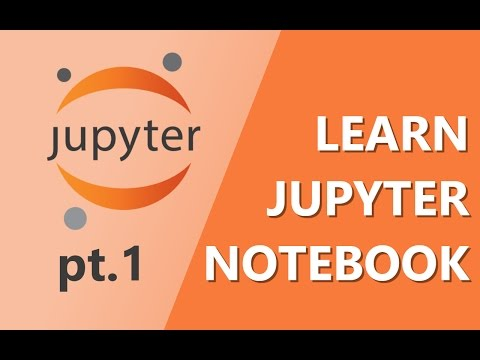

In [1]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("Hr4yh1_4GlQ")
display(vid)

# Interaktivni graf rješenja

Pogledajmo sada jednadžbu čije rješenje predstavlja slobodne vibracije opruge. 

Ako $x(t)$ predstavlja otklon od ravnotežnog položaja, slobodne vibracije tiranja mase $m$ obješene na oprugu krutosti $k$ opisane su diferencijalnom jednadžbom
$$mx″(t)+kx(t)=0.$$
gdje su $k$ i $m$ pozitivni realni brojevi. Prema uputama ovu jednadžbu možemo jednostavno riješiti analitički. 

Posebice, uz početne uvjete 
$x(0)=a_0$ i $x'(0)=b_0$ dobivamo rješenje
$$y(t)=a_0 \cos\left(\sqrt{\frac{k}{m}}x\right)+b_0\sqrt{\frac{m}{k}}\sin\left(\sqrt{\frac{k}{m}}t\right).$$


Sada ćemo pokazati kako možemo upotrijebiti biblioteku SymPy za dobivanje rješenja.
SymPy je biblioteka u skopu Pythona za simboličku matematiku.
Pogledajmo ponovno  slobodne vibracije opruge. Ako $x(t)$ predstavlja otklon od ravnotežnog položaja, slobodne vibracije tiranja mase $m$ obješene na oprugu krutosti $k$ opisane su diferencijalnom jednadžbom
$$mx''(t)+kx(t)=0.$$
gdje su $k$ i $m$ pozitivni realni brojevi.
Pokazali smo kako riješiti navedenu jednadžbu analitički. Pogledajmo kako to možemo učiniti upotrebom biblioteke SymPy.

Obična diferencijalna jednadžba:


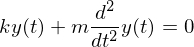

Opće rješenje:


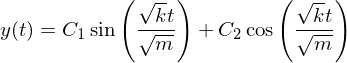

Rješenje Cauchyevog problema:


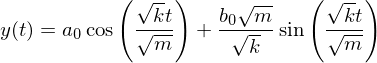

In [2]:
from IPython.display import display
import sympy as sy

sy.init_printing()  # LaTeX-like pretty printing for IPython

t = sy.Symbol("t", real=True)
#m, k = sy.symbols('m k', real=True)  # gives C_1 Exp() + C_2 Exp() solution
m, k = sy.symbols('m k', positive=True)  # gives C_1 sin() + C_2 cos() sol.
a0, b0 = sy.symbols('a0, b0', real=True)
y = sy.Function('y')

Eq1 = sy.Eq(m*sy.diff(y(t), t, 2) + k*y(t))
print("Obična diferencijalna jednadžba:")
display(Eq1)

print("Opće rješenje:")
y_sl0 = sy.dsolve(Eq1, y(t)).rhs  # take only right hand side
display(sy.Eq(y(t), y_sl0))

# Initial conditions:
cnd0 = sy.Eq(y_sl0.subs(t, 0), a0)  # y(0) = a0
cnd1 = sy.Eq(y_sl0.diff(t).subs(t, 0), b0)  # y'(0) = b0

#  Solve for C1, C2:
C1, C2 = sy.symbols("C1, C2")  # generic constants
C1C2_sl = sy.solve([cnd0, cnd1], (C1, C2))

# Substitute back into solution:
y_sl1 = sy.simplify(y_sl0.subs(C1C2_sl))
print("Rješenje Cauchyevog problema:")
display(sy.Eq(y(t), y_sl1))

Nacrtajmo rješenje ove diferencijane jednadžbe koristeći interaktivni graf! To možemo učiniti korištenjem biblioteke $\mathbf{ipywidgets.}$

In [3]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, k, a0, b0):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, a0*np.cos(np.sqrt(k/m)*x)+b0*np.sqrt(m/k)*np.sin(np.sqrt(k/m)*x))
    plt.ylim(-3, 3)
    plt.show()

interactive_plot = interactive(f, m=(0.1, 2.0), k=(0, 3, 0.5), a0=(0.0, 2.0), b0=(0.0,2.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.05, description='m', max=2.0, min=0.1), FloatSlider(value=1.0, description='k', max=3.0, step=0.5), FloatSlider(value=1.0, description='a0', max=2.0), FloatSlider(value=1.0, description='b0', max=2.0), Output(layout=Layout(height='350px'))), _dom_classes=('widget-interact',))

Pogledajmo sada kako možemo grafički prikazati titranje opruge koristeći bibilioteku $\mathbf{matplotlib}$

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.lines as lines

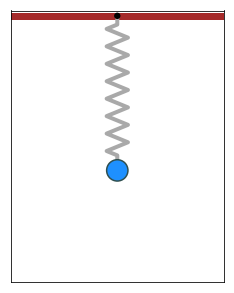

In [5]:
def draw_spring(otklon, length=16.5, radius=4):
    ax = plt.gca()
    v = -length + otklon
    ax.axhline(0.0, color='Brown', lw=7, zorder=0)
    x1=np.array([0.0,  0.0, -1.0,  1.0, -1.0,  1.0, -1.0,  1.0, -1.0,  1.0,  -1.0,  1.0, -1.0,   1.0,  -1.0,  1.0,   -1.0,  0.0,  0.0])
    y1=np.array([0.0, -1.0, -1.5, -2.5, -3.5, -4.5, -5.5, -6.5, -7.5, -8.5, -9.5, -10.5, -11.5, -12.5,-13.5, -14.5, -15.5, -16.0, -16.5 ])
    y2=((-v)/16.5)*y1
    rod = lines.Line2D(x1,y2,lw=4, color='DarkGray', zorder=1)
    bob = patches.Circle([0.0, v-1.0], radius, fc='DodgerBlue', ec='DarkSlateGray',lw=1.5, zorder=3)
    peg = patches.Circle([0.0, 0.0], 0.3,fc='black', zorder=2)
    ax.add_patch(bob)
    ax.add_patch(peg)
    ax.add_line(rod)
    # return ax
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.set_xlim(-10,10)
ax.set_ylim(-25,0.5)

draw_spring(0.0, length=13.5, radius=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("opruga.png")

Sada ćemo izraditi animaciju slobodnih vibracija opruge koristeći biblioteku $\mathbf{animate}$

In [6]:
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"

In [7]:
def init():
    pass
    #draw_spring(0.0, length=13.5, radius=1)
    #ax.set_xticks([])
    #ax.set_yticks([])
    #return ax

def animate(t):
    ax = plt.gca()
    ax.clear()
    ax.set_aspect('equal')
    ax.set_xlim(-10,10)
    ax.set_ylim(-25,0.5)
    a0=5.0
    b0=1.0
    m=1.0
    k=1.0
    otklon=a0*np.cos(np.sqrt(k/m)*(t)+b0*np.sqrt(m/k)*np.sin(np.sqrt(k/m)*(t)))
    draw_spring(otklon, length=13.5, radius=1)
    ax.set_xticks([])
    ax.set_yticks([])
    #return ax
                                                        


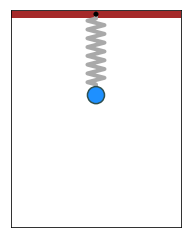

In [8]:
%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"
# ovo su dijelovi videa - za ove t-ove ce se iscrtati
t = np.linspace(0, 4*np.pi, 50)
fig, ax = plt.subplots()
animation.FuncAnimation(fig, animate, frames=t)


# SciPy i njihalo

Pogledajmo na koji način smo dobili animaciju matematičkog njihala.
Za dobivanje rješenja navedene jednadžbe koristit ćemo biblioteku scipy.
Za početak, pogledajmo kako crtamo matematičko njihalo korištenjem biblioteka numpy i matplotlib

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.lines as lines

Definirajmo sada funkciju koja će crtati matematičko njihalo te snimimo sliku njihala u radni direktorij.

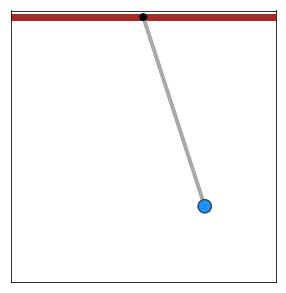

In [12]:
def draw_pendulum(theta, length=5, radius=4):
    ax = plt.gca()
    v = length * np.array([np.sin(theta), -np.cos(theta)])
    ax.axhline(0.0, color='Brown', lw=7, zorder=0)
    rod = lines.Line2D([0.0, v[0]], [0.0, v[1]],lw=4, color='DarkGray', zorder=1)
    bob = patches.Circle(v, radius, fc='DodgerBlue', ec='DarkSlateGray',lw=1.5, zorder=3)
    peg = patches.Circle([0.0, 0.0], 0.3,fc='black', zorder=2)
    ax.add_patch(bob)
    ax.add_patch(peg)
    ax.add_line(rod)
    #return ax


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.set_xlim(-10,10)
ax.set_ylim(-20,0.5)
draw_pendulum(np.pi / 10, length=15, radius=0.5)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("njihalo.png")

Sada moramo definirati jednadžbu koju ćemo rješavati. Ovdje koristimo numeričko rješavanje diferencijalne jednadžbe pomoću  funkcije [ode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html) iz biblioteke SciPy


In [13]:
from scipy.integrate import ode
def pendulum_eq(t, x, c=1, f=lambda t:0.0):
    theta, omega = x
    #return np.array([omega, -np.sin(theta) - c * omega + f(t)], dtype=np.float64)
    return np.array([omega, -np.sin(theta)], dtype=np.float64)


solver = ode(pendulum_eq)
solver.set_integrator('lsoda')
c = 0.3
#f = lambda t: 2.0 * np.sin(3 * t)
f= lambda t: 0.0 * np.sin(3 * t)
solver.set_f_params(c, f)

In [14]:
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML, Image
plt.rcParams["animation.html"] = "jshtml"
rc('animation', html='html5')

In [15]:
def animate(t):
    ax = plt.gca()
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_xlim(-10,10)
    ax.set_ylim(-20,0.5)
    
    theta, omega = solver.integrate(t+dt)
    draw_pendulum(theta=theta, length=15, radius=0.5)
    
    #return ax
                           

In [16]:
import warnings
warnings.filterwarnings("ignore")

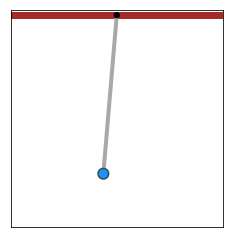

In [17]:
%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"

ic = np.array([0.0, 0.5])
solver.set_initial_value(ic, 0.0)
dt = 0.1
t = np.arange(0.0, 4*np.pi, dt)
fig, ax = plt.subplots()
anim=animation.FuncAnimation(fig, animate, frames=t)
anim